<a href="https://colab.research.google.com/github/jazmin9930/Proyecto-Lenguajes-de-programacion/blob/main/Analisis_de_Datos_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORTACION Y CARGA DE *DATOS*

In [171]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory (2).csv


In [197]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory (2).csv']))

2. ANALISIS EXPOLARATORIO

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.head(50)

In [ ]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

In [ ]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

In [ ]:
separacion_lista.num_partes.value_counts()

Se analizaran los titulos por numero de partes a ver si hay algun patron

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

3. CREACION DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

In [ ]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

In [ ]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [ ]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

In [ ]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4']
separacion_cols

In [ ]:
df = pd.concat([df,separacion_cols], axis = 1)
df

3.2 VARIABLES DERIVADAS DE LAS FECHAS

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [ ]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

In [ ]:
df.set_index('fecha', inplace = True)
df

Creamos una función para extraer los componentes.

In [216]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [ ]:
atributos_fechas(df)

4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [ ]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Jazmin, llevas usando Netflix {tiempo.days} dias')

¿Cuanto me he gastado en Netflix hasta ahora?

In [ ]:
coste_mensual = 12

gasto = tiempo.days / 30 * coste_mensual

print(f'Jazmin, hasta ahora te has gastado {gasto} euros en Netflix')

¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [221]:

media_min_serie = 45
media_min_peli = 100
consumo = df.loc[df.año < 2023].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Jazmin, al año dedicas {round(dias_series_año)} días de tu vida a ver series y {round(dias_pelis_año)} días de tu vida a ver películas')

Jazmin, al año dedicas 4 días de tu vida a ver series y 5 días de tu vida a ver películas


¿Cuales son las 10 series de las que he visto más capítulos?

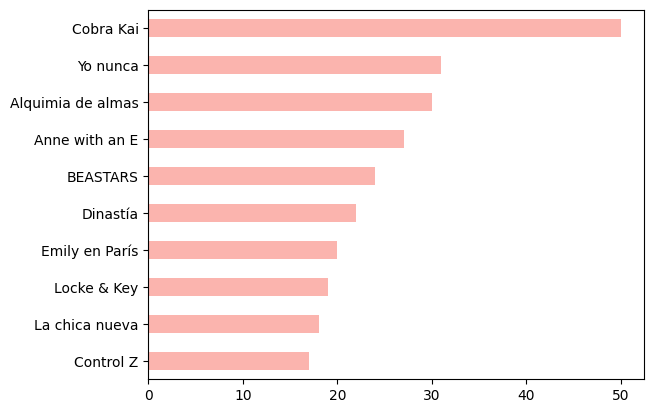

In [225]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

Podemos buscar titulos que contengas ciertas pablas como:

In [229]:
df[df.Title.str.contains('the')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,
2023-04-07,Royalteen: La princesa Margrethe,pelicula,Royalteen,La princesa Margrethe,None,None,2023,April,7,Friday
2023-02-26,La primera vez: Las penas de amor del joven We...,pelicula,La primera vez,Las penas de amor del joven Werther,None,None,2023,February,26,Sunday
2021-10-28,Locke & Key: Temporada 1: Bienvenidos a Matheson,serie,Locke & Key,Temporada 1,Bienvenidos a Matheson,None,2021,October,28,Thursday
2021-03-09,Another Miss Oh: Episodio 13,pelicula,Another Miss Oh,Episodio 13,None,None,2021,March,9,Tuesday


¿Qué día de la semana suelo ver más series?

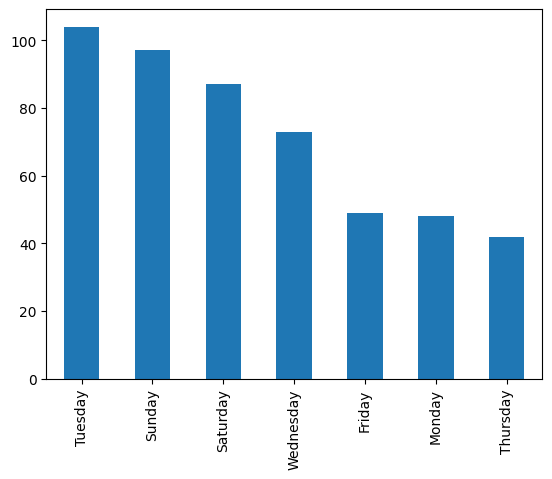

In [230]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Existen diferencias en Netflix entre series y películas?

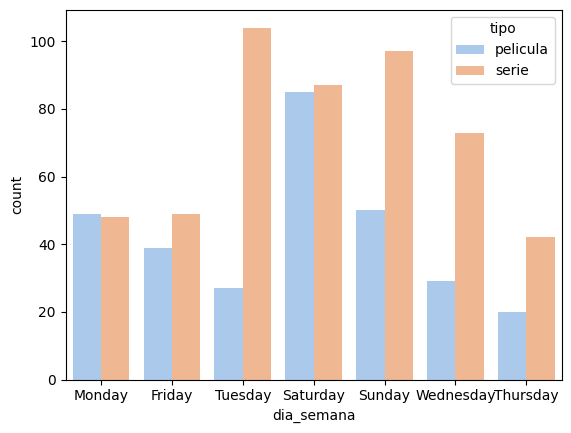

In [223]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

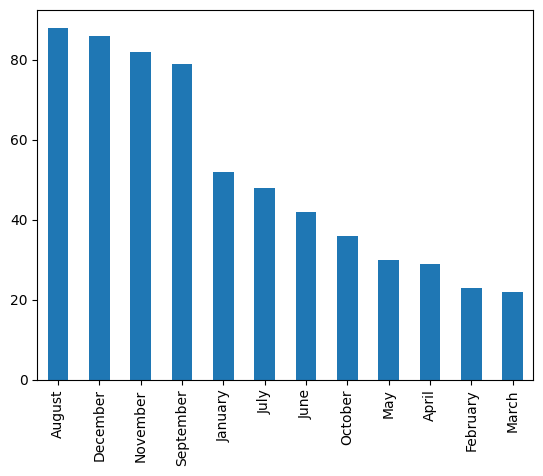

In [ ]:
df.loc[df.año < 2023].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

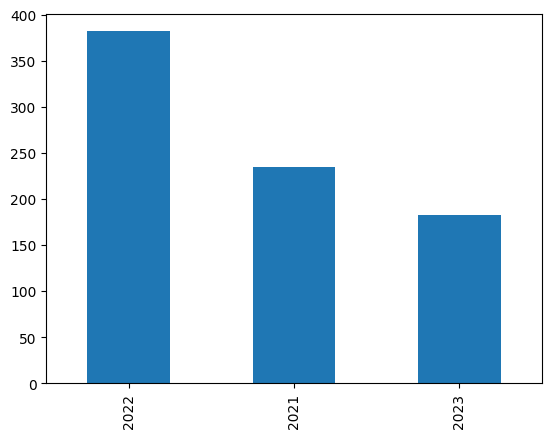

In [ ]:
df.año.value_counts().plot.bar();